#### 1. Objective of EDA
#### 2. Data Overview
#### 3. User Activity Analysis
#### 4. Steps vs Calories
#### 5. Sleep Analysis
#### 6. Activity vs Sleep Relationship
#### 7. Key Insights (Business-ready)

## Exploratory Data Analysis (EDA)
### Objective
The objective of this analysis is to explore user activity and sleep behavior
using smart device data to identify patterns and insights that can help
Bellabeat improve its marketing strategy and product positioning.

### Data Overview

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load cleaned activity + sleep dataset for EDA
activity_sleep = pd.read_csv("clean_activity_sleep.csv")

# Preview first 5 rows to understand structure
activity_sleep.head()

,user_id,date,steps,total_distance,tracker_distance,logged_distance,very_active_dist,moderate_active_dist,light_active_dist,sedentary_dist,...,fair_active_min,light_active_mint,sedentary_min,calories,sleep_records,mints_asleep,time_bond,dayofweek,activity_level,sleephours
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,1,327,346,Tuesday,High,5.450000
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,2,384,407,Wednesday,High,6.400000
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,1,412,442,Friday,Medium,6.866667
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,2,340,367,Saturday,High,5.666667
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,20,164,539,1728,1,700,712,Sunday,Medium,11.666667


In [30]:
# Create a copy of the dataset to avoid modifying the original data during EDA
activity_sleep = activity_sleep.copy()

In [31]:
activity_sleep.shape

(410, 21)

In [32]:
activity_sleep["date"] = pd.to_datetime(activity_sleep["date"])

In [33]:
activity_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               410 non-null    int64         
 1   date                  410 non-null    datetime64[ns]
 2   steps                 410 non-null    int64         
 3   total_distance        410 non-null    float64       
 4   tracker_distance      410 non-null    float64       
 5   logged_distance       410 non-null    float64       
 6   very_active_dist      410 non-null    float64       
 7   moderate_active_dist  410 non-null    float64       
 8   light_active_dist     410 non-null    float64       
 9   sedentary_dist        410 non-null    float64       
 10  very_active_min       410 non-null    int64         
 11  fair_active_min       410 non-null    int64         
 12  light_active_mint     410 non-null    int64         
 13  sedentary_min       

In [34]:
activity_sleep.describe()

,user_id,date,steps,total_distance,tracker_distance,logged_distance,very_active_dist,moderate_active_dist,light_active_dist,sedentary_dist,very_active_min,fair_active_min,light_active_mint,sedentary_min,calories,sleep_records,mints_asleep,time_bond,sleephours
count,4.100000e+02,410,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,2016-04-26 11:38:55.609756160,8514.909756,6.012390,6.007366,0.108867,1.446220,0.743902,3.791122,0.000927,25.046341,17.924390,216.541463,712.100000,2389.295122,1.119512,419.173171,458.482927,6.986220
min,1.503960e+09,2016-04-12 00:00:00,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,2.000000,0.000000,257.000000,1.000000,58.000000,61.000000,0.966667
25%,3.977334e+09,2016-04-19 00:00:00,5188.750000,3.592500,3.592500,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,0.000000,158.000000,631.250000,1841.000000,1.000000,361.000000,403.750000,6.016667
50%,4.702922e+09,2016-04-27 00:00:00,8913.000000,6.270000,6.270000,0.000000,0.570000,0.420000,3.665000,0.000000,9.000000,11.000000,208.000000,717.000000,2207.000000,1.000000,432.500000,463.000000,7.208333
75%,6.962181e+09,2016-05-04 00:00:00,11370.250000,8.005000,7.950000,0.000000,2.360000,1.037500,4.917500,0.000000,38.000000,26.750000,263.000000,782.750000,2920.000000,1.000000,490.000000,526.000000,8.166667
max,8.792010e+09,2016-05-12 00:00:00,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,143.000000,518.000000,1265.000000,4900.000000,3.000000,796.000000,961.000000,13.266667
std,2.060863e+09,NaN,4157.375584,3.043946,3.039279,0.505523,1.992591,0.999806,1.720788,0.008685,36.218237,22.418593,86.705299,166.179395,758.435040,0.346636,118.635918,127.455140,1.977265


In [36]:
activity_sleep.isnull().sum()

user_id                 0
date                    0
steps                   0
total_distance          0
tracker_distance        0
logged_distance         0
very_active_dist        0
moderate_active_dist    0
light_active_dist       0
sedentary_dist          0
very_active_min         0
fair_active_min         0
light_active_mint       0
sedentary_min           0
calories                0
sleep_records           0
mints_asleep            0
time_bond               0
dayofweek               0
activity_level          0
sleephours              0
dtype: int64

## User Activity Level Distribution

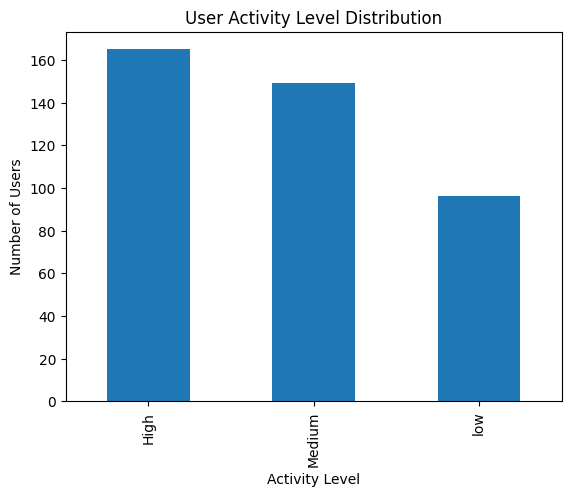

In [41]:
activity_sleep["activity_level"].value_counts().plot(kind="bar")
plt.title("User Activity Level Distribution")
plt.xlabel("Activity Level")
plt.ylabel("Number of Users")
plt.show()

## Steps vs Calories

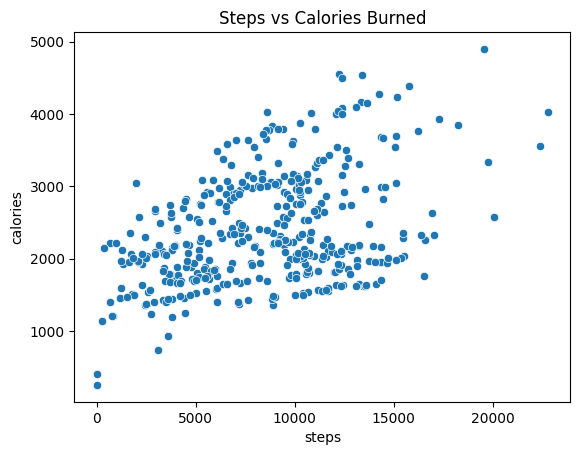

In [42]:
sns.scatterplot(
    data = activity_sleep,
    x = "steps",
    y = "calories"
)
plt.title("Steps vs Calories Burned")
plt.show()

## Steps vs Sleep Duration

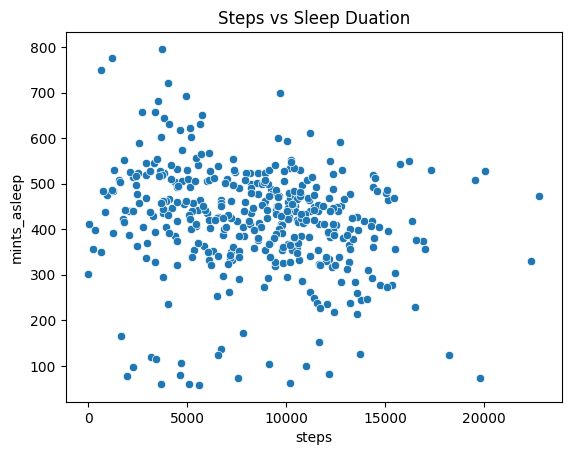

In [43]:
sns.scatterplot(
    data = activity_sleep,
    x = "steps",
    y = "mints_asleep"
)
plt.title("Steps vs Sleep Duation")
plt.show()

## Sleep Efficiency

In [48]:
activity_sleep["sleep_efficiency"] = activity_sleep["mints_asleep"]/activity_sleep["time_bond"]

In [52]:
activity_sleep.groupby("activity_level")["sleep_efficiency"].mean()

activity_level
High      0.902237
Medium    0.924631
low       0.928253
Name: sleep_efficiency, dtype: float64

## Weekday vs Weekend Behaviour

In [56]:
activity_sleep["date"] = pd.to_datetime(activity_sleep["date"])
activity_sleep["Weekday"] = activity_sleep["date"].dt.day_name()

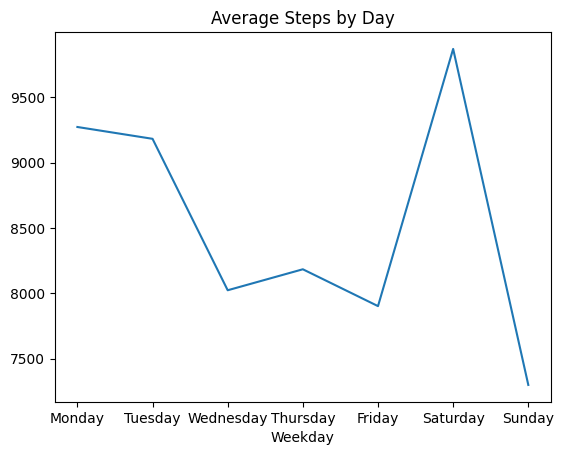

In [61]:
activity_sleep.groupby("Weekday")["steps"].mean().reindex([
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
]).plot(kind="line")
plt.title("Average Steps by Day")
plt.show()

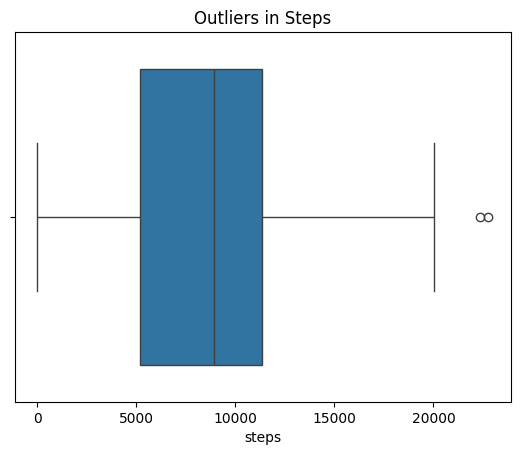

In [62]:
sns.boxplot(x=activity_sleep["steps"])
plt.title("Outliers in Steps")
plt.show()

## Key Insights
- Most users fall under Medium and High activity levels, fewer users are Low activity.
- More steps lead to higher calorie burn, showing a clear positive relationship.
- Steps and sleep duration are weakly related — more activity does not always mean longer sleep.
- Sleep efficiency is high (90%+) across all activity levels, indicating good sleep quality overall.
- Medium and Low activity users have slightly better sleep efficiency than highly active users.
- Activity peaks on Saturdays, while mid-week and Sunday show lower step counts.
- Some extreme step outliers exist, which may need special handling in analysis.